In [1]:
from google.colab import files
uploaded = files.upload()


Saving telco_churn_cleaned.csv to telco_churn_cleaned.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('telco_churn_cleaned.csv')

In [5]:
df.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Male,...,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,avg_monthly_spend,long_term_customer
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,True,False,14.925000,0
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,True,False,False,False,True,53.985714,1
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,True,36.050000,0
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,False,False,True,False,False,False,False,40.016304,1
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,True,False,50.550000,0


In [6]:
df.isnull().sum()

,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
paperlessbilling,0
monthlycharges,0
totalcharges,0
churn,0
gender_Male,0


# Setting up Validation Frame Work

In [7]:
# perfom train/validation/test using sklearn
from sklearn.model_selection import train_test_split

In [8]:
# Convert boolean columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   seniorcitizen                          7043 non-null   int64  
 1   partner                                7043 non-null   int64  
 2   dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   phoneservice                           7043 non-null   int64  
 5   paperlessbilling                       7043 non-null   int64  
 6   monthlycharges                         7043 non-null   float64
 7   totalcharges                           7043 non-null   float64
 8   churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   int64  
 10  multiplelines_No phone service         7043 non-null   int64  
 11  mult

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='churn')
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [10]:
X_train.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,gender_Male,multiplelines_No phone service,...,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,avg_monthly_spend,long_term_customer
3738,0,0,0,35,0,0,49.20,1701.65,1,1,...,1,0,1,0,0,0,1,0,47.268056,1
3151,0,1,1,15,1,0,75.10,1151.55,1,0,...,0,0,0,0,0,0,0,1,71.971875,0
4860,0,1,1,13,0,0,40.55,590.35,1,1,...,0,0,0,0,1,0,0,1,42.167857,0
3867,0,1,0,26,1,1,73.50,1905.70,0,0,...,1,0,1,0,1,1,0,0,70.581481,1
3810,0,1,1,1,1,0,44.55,44.55,1,0,...,0,0,0,0,0,0,1,0,22.275000,0


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log_model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [13]:
log_model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [14]:
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


# Logistic Regression Evaluation


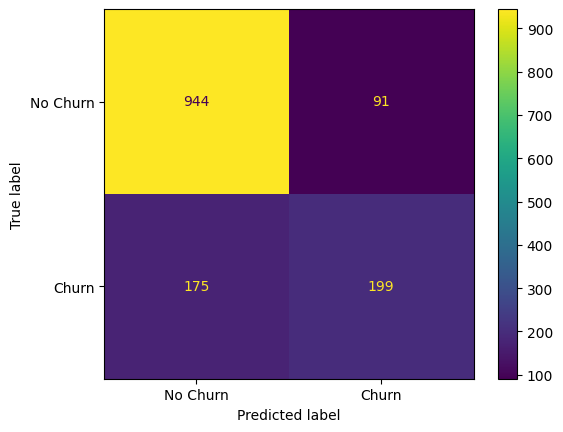

In [15]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay
)

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_log),
    display_labels=['No Churn', 'Churn']
).plot()


In [16]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.69      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [17]:
roc_auc_log = roc_auc_score(y_test, y_prob_log)
roc_auc_log


np.float64(0.8487974372884858)

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [20]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# Random Forest Evaluation

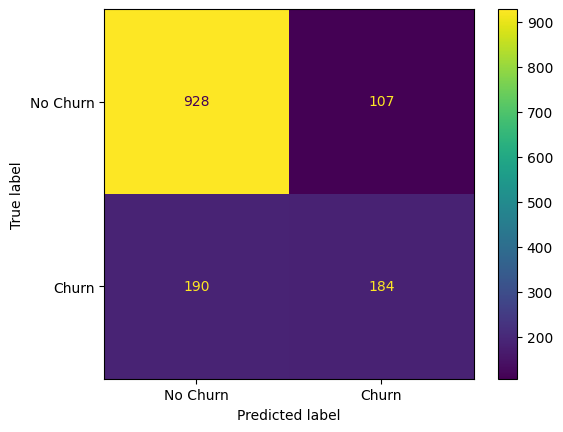

In [21]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_rf),
    display_labels=['No Churn', 'Churn']
).plot()


In [22]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [23]:
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_rf


np.float64(0.8258092433284251)

# Model Comparison

In [24]:
import pandas as pd

pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'ROC-AUC': [roc_auc_log, roc_auc_rf]
})


,Model,ROC-AUC
0,Logistic Regression,0.848797
1,Random Forest,0.825809


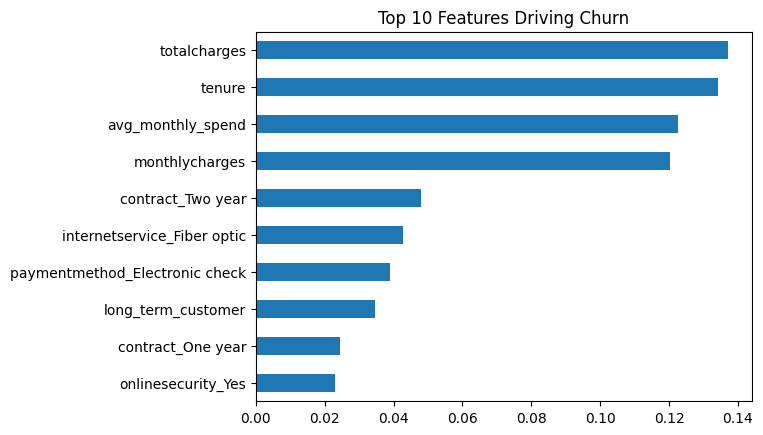

In [25]:
import matplotlib.pyplot as plt

feat_imp = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)[:10]

feat_imp.plot(kind='barh')
plt.title('Top 10 Features Driving Churn')
plt.gca().invert_yaxis()
plt.show()


#  MODELS WITH SMOTE


In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [27]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [28]:
print(f"\nSMOTE-balanced class distribution in training set:")
print(f"Class 0 (No Churn): {sum(y_train_smote == 0)} samples ({sum(y_train_smote == 0)/len(y_train_smote)*100:.2f}%)")
print(f"Class 1 (Churn): {sum(y_train_smote == 1)} samples ({sum(y_train_smote == 1)/len(y_train_smote)*100:.2f}%)")


SMOTE-balanced class distribution in training set:
Class 0 (No Churn): 4139 samples (50.00%)
Class 1 (Churn): 4139 samples (50.00%)


# Logistic Regression with SMOTE

In [30]:
log_model_smote = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
log_model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [31]:
y_pred_log_smote = log_model_smote.predict(X_test)
y_prob_log_smote = log_model_smote.predict_proba(X_test)[:, 1]

In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_smote, target_names=['No Churn', 'Churn']))

roc_auc_log_smote = roc_auc_score(y_test, y_prob_log_smote)
print(f"\nROC-AUC Score: {roc_auc_log_smote:.4f}")

Confusion Matrix:
[[851 184]
 [131 243]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.87      0.82      0.84      1035
       Churn       0.57      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409


ROC-AUC Score: 0.8344


#Random Forest with SMOTE

In [33]:
# Note: With SMOTE, we don't need class_weight='balanced' since we've balanced the data
rf_model_smote = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight=None  # Data is already balanced with SMOTE
)

In [34]:
rf_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=300, random_state=42)

In [35]:
y_pred_rf_smote = rf_model_smote.predict(X_test)
y_prob_rf_smote = rf_model_smote.predict_proba(X_test)[:, 1]

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_smote, target_names=['No Churn', 'Churn']))

Confusion Matrix:
[[865 170]
 [150 224]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.84      0.84      1035
       Churn       0.57      0.60      0.58       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



In [37]:
roc_auc_rf_smote = roc_auc_score(y_test, y_prob_rf_smote)
print(f"\nROC-AUC Score: {roc_auc_rf_smote:.4f}")



ROC-AUC Score: 0.8233


# COMPARISON AND VISUALIZATION

In [38]:
pd.DataFrame({
    'Model': ['Logistic Regression With Smote', 'Random Forest With Smote'],
    'ROC-AUC_SMT': [roc_auc_log_smote,roc_auc_rf_smote]
})

,Model,ROC-AUC_SMT
0,Logistic Regression With Smote,0.834380
1,Random Forest With Smote,0.823275
